In [176]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as ltb
from sklearn.neural_network import MLPClassifier
from copy import deepcopy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [177]:
trainx = pd.read_csv('traintestdata/trainx.csv', header=None, index_col = None)
trainy = pd.read_csv('traintestdata/trainy.csv', header=None, index_col = None)

In [178]:
trainx
trainy

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.420000e-06,3.982600e-06,-1.449500e-06,7.566100e-07,-1.833000e-06,3.078100e-05,1.328300e-05,-1.191000e-07,2.123900e-07,-5.811500e-06,-6.490600e-06,-2.335500e-05
1,-6.998800e-06,4.051200e-06,1.898300e-06,4.208100e-07,-1.156600e-07,3.329800e-05,1.395400e-05,4.846100e-08,3.942600e-06,-2.553000e-06,-6.154800e-06,-1.194200e-05
2,-1.273400e-05,3.216600e-06,5.469300e-06,1.763500e-06,1.614600e-06,2.708800e-05,9.757300e-06,2.164400e-07,6.897700e-06,8.051200e-06,-7.833200e-06,2.325100e-06
3,-7.584600e-06,-8.413400e-07,4.968800e-06,1.763400e-06,1.733900e-07,1.399600e-05,7.071500e-06,2.169800e-07,9.069400e-06,1.112200e-05,-1.102200e-05,7.528000e-06
4,2.659000e-06,-5.438300e-06,-6.518100e-07,-8.299200e-08,2.327600e-07,4.764700e-06,5.057200e-06,-1.177700e-07,1.090800e-05,8.570900e-06,-1.068600e-05,9.541900e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1877571,1.222563e-07,2.917921e-08,-1.193130e-07,-3.820293e-08,-9.663117e-11,8.046714e-09,3.594589e-08,-1.702848e-10,-8.884903e-08,2.072004e-08,1.315527e-08,5.448945e-08
1877572,1.138264e-07,4.171979e-08,-1.082151e-07,-3.514534e-08,6.749150e-09,6.266717e-09,3.557055e-08,-1.730667e-10,-1.101903e-07,2.065944e-08,1.184100e-08,4.398572e-08
1877573,1.137600e-07,4.766355e-08,-1.050310e-07,-3.163813e-08,1.388733e-08,5.367734e-09,3.696987e-08,-1.769970e-10,-1.173866e-07,2.369757e-08,1.626901e-08,2.991001e-08
1877574,1.136776e-07,3.727422e-08,-1.093621e-07,-2.900411e-08,1.798592e-08,-1.284148e-09,2.248941e-08,-1.774586e-10,-1.320851e-07,2.277006e-08,2.202707e-08,1.578495e-08


,0
0,1
1,1
2,1
3,1
4,1
...,...
1877571,0
1877572,0
1877573,0
1877574,0


In [179]:
trainx_t = deepcopy(trainx.iloc[0:1000,:])
trainy_t = deepcopy(trainy.iloc[0:1000,:])

In [180]:
trainx_t
trainy_t

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.420000e-06,3.982600e-06,-1.449500e-06,7.566100e-07,-1.833000e-06,3.078100e-05,1.328300e-05,-1.191000e-07,2.123900e-07,-5.811500e-06,-6.490600e-06,-2.335500e-05
1,-6.998800e-06,4.051200e-06,1.898300e-06,4.208100e-07,-1.156600e-07,3.329800e-05,1.395400e-05,4.846100e-08,3.942600e-06,-2.553000e-06,-6.154800e-06,-1.194200e-05
2,-1.273400e-05,3.216600e-06,5.469300e-06,1.763500e-06,1.614600e-06,2.708800e-05,9.757300e-06,2.164400e-07,6.897700e-06,8.051200e-06,-7.833200e-06,2.325100e-06
3,-7.584600e-06,-8.413400e-07,4.968800e-06,1.763400e-06,1.733900e-07,1.399600e-05,7.071500e-06,2.169800e-07,9.069400e-06,1.112200e-05,-1.102200e-05,7.528000e-06
4,2.659000e-06,-5.438300e-06,-6.518100e-07,-8.299200e-08,2.327600e-07,4.764700e-06,5.057200e-06,-1.177700e-07,1.090800e-05,8.570900e-06,-1.068600e-05,9.541900e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.649593e-07,1.200666e-06,-6.577025e-07,4.102911e-08,6.637471e-08,-1.261118e-07,-1.004123e-07,-5.499915e-09,1.188152e-06,3.276550e-07,1.709648e-07,2.563450e-07
996,-3.195310e-07,1.226837e-06,-6.686949e-07,2.299337e-08,1.219586e-07,-1.259904e-07,-9.948695e-08,-6.379709e-09,1.025326e-06,3.210739e-07,1.686308e-07,2.600803e-07
997,-2.034564e-07,1.285349e-06,-6.642327e-07,1.283608e-08,1.635454e-07,-1.090935e-07,-9.016023e-08,-5.936340e-09,5.601305e-07,2.960295e-07,1.499340e-07,2.529616e-07
998,-2.437465e-07,1.258284e-06,-6.700595e-07,-5.756060e-09,1.495756e-07,-8.378060e-08,-7.054259e-08,-5.492608e-09,2.647769e-07,2.859298e-07,9.701295e-08,2.400252e-07


,0
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [187]:
# add overlapping window to training data
trainx_aft_window = deepcopy(trainx_t)
trainy_aft_window = deepcopy(trainy_t)

for i in tqdm(range(379,len(trainx_t))):
    for j in range(0,12):
        trainx_aft_window.iloc[i,j] = trainx_t.iloc[i-379:i+1,j].mean()

trainx_aft_window = trainx_aft_window.iloc[379:len(trainx_aft_window),:]
trainy_aft_window = trainy_aft_window.iloc[379:len(trainy_aft_window),:]

In [188]:
a = 379
trainx_t.iloc[a-379:a+1,0].mean()
trainx_aft_window.iloc[a-379,0]

-1.092400634916896e-07

-1.092400634916896e-07

In [183]:
trainx_aft_window

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.420000e-06,3.982600e-06,-1.449500e-06,7.566100e-07,-1.833000e-06,3.078100e-05,1.328300e-05,-1.191000e-07,2.123900e-07,-5.811500e-06,-6.490600e-06,-2.335500e-05
1,-6.998800e-06,4.051200e-06,1.898300e-06,4.208100e-07,-1.156600e-07,3.329800e-05,1.395400e-05,4.846100e-08,3.942600e-06,-2.553000e-06,-6.154800e-06,-1.194200e-05
2,-1.273400e-05,3.216600e-06,5.469300e-06,1.763500e-06,1.614600e-06,2.708800e-05,9.757300e-06,2.164400e-07,6.897700e-06,8.051200e-06,-7.833200e-06,2.325100e-06
3,-7.584600e-06,-8.413400e-07,4.968800e-06,1.763400e-06,1.733900e-07,1.399600e-05,7.071500e-06,2.169800e-07,9.069400e-06,1.112200e-05,-1.102200e-05,7.528000e-06
4,2.659000e-06,-5.438300e-06,-6.518100e-07,-8.299200e-08,2.327600e-07,4.764700e-06,5.057200e-06,-1.177700e-07,1.090800e-05,8.570900e-06,-1.068600e-05,9.541900e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-6.129723e-07,1.058312e-06,-6.608094e-07,1.247656e-08,-6.259272e-08,-1.182106e-07,-2.747396e-08,-5.121836e-09,7.879630e-07,3.100798e-07,8.394627e-08,3.326170e-07
996,-6.091614e-07,1.058936e-06,-6.616272e-07,1.250335e-08,-6.251518e-08,-1.180890e-07,-2.786981e-08,-5.120497e-09,7.863766e-07,3.089601e-07,8.405091e-08,3.328595e-07
997,-6.047550e-07,1.059742e-06,-6.625507e-07,1.247933e-08,-6.233736e-08,-1.179327e-07,-2.823696e-08,-5.117647e-09,7.837519e-07,3.077403e-07,8.410748e-08,3.330905e-07
998,-6.003090e-07,1.060434e-06,-6.635317e-07,1.239037e-08,-6.220970e-08,-1.177300e-07,-2.844138e-08,-5.114430e-09,7.800263e-07,3.065006e-07,8.403167e-08,3.333306e-07


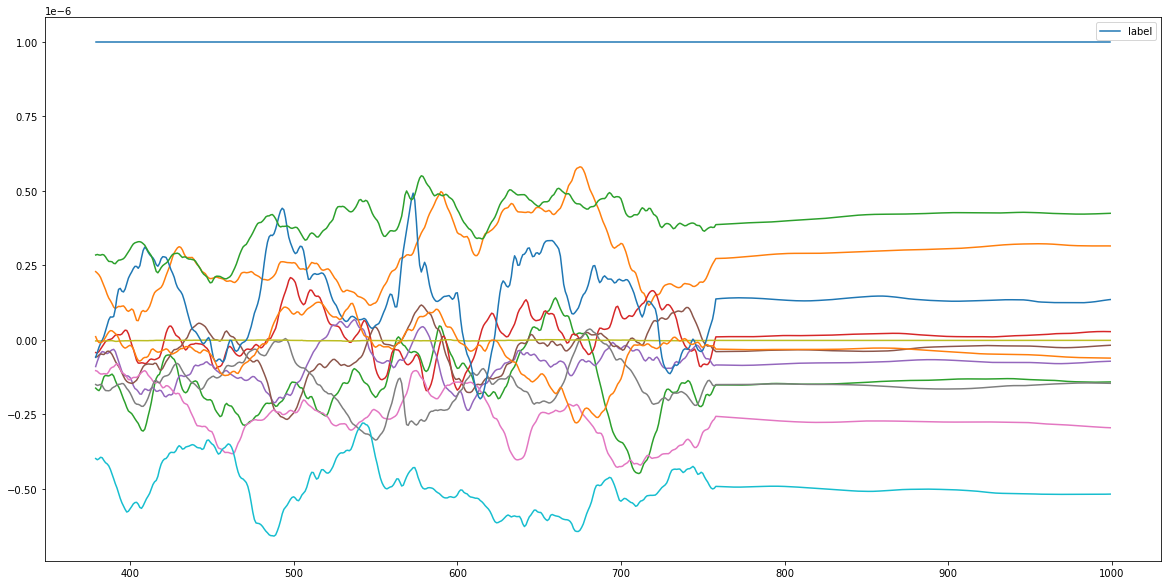

In [153]:
# trainx_aft_window = trainx_aft_window.reset_index(drop = True)
# trainy_aft_window = trainy_aft_window.reset_index(drop= True)

index = np.array(trainx_aft_window.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy_aft_window*0.000001)
for i in tqdm(range(0,12)):
    ax.plot(index, trainx_aft_window[i])
    
line1.set_label('label')
ax.legend()
plt.show()

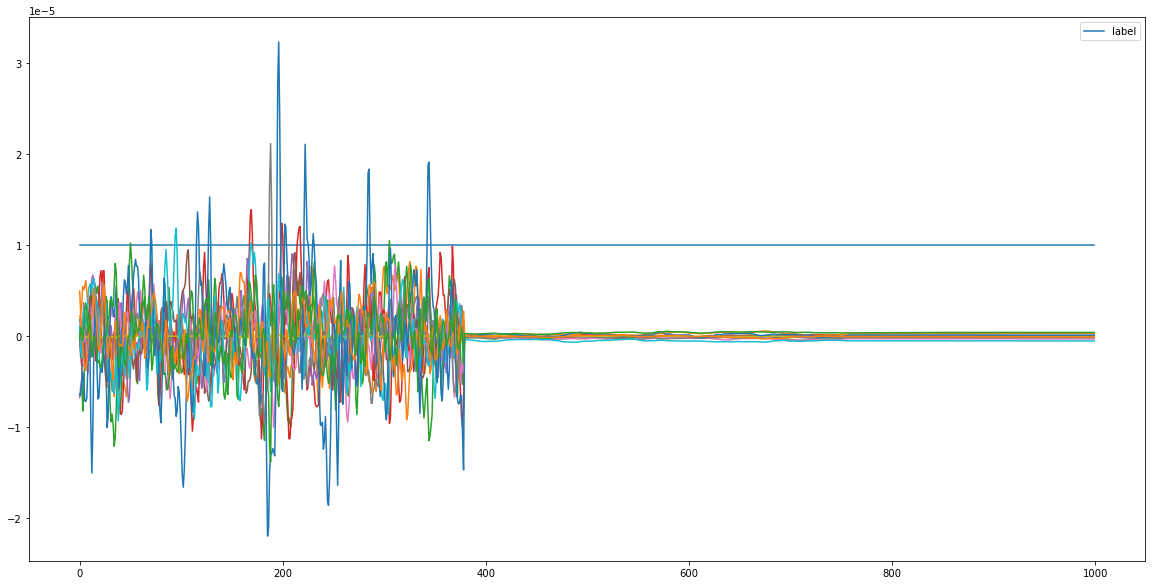

In [154]:
# trainx_aft_window = trainx_aft_window.reset_index(drop = True)
# trainy_aft_window = trainy_aft_window.reset_index(drop= True)

index = np.array(trainx_t.index)
fig, ax = plt.subplots(1, figsize = (20,10))
line1, = ax.plot(trainy_t*0.00001)
for i in tqdm(range(0,12)):
    ax.plot(index, trainx_t[i])
    
line1.set_label('label')
ax.legend()
plt.show()

In [164]:
a = 379
trainx_t.iloc[a-379:a+1,0].mean()

-1.092400634916896e-07

In [165]:
trainx_aft_window = deepcopy(trainx_t)

for i in tqdm(range(379,len(trainx_t))):
    for j in range(0,12):
        trainx_aft_window.iloc[i,j] = trainx_t.iloc[i-379:i+1,j].mean()

In [166]:
a = 379
trainx_t.iloc[a-379:a+1,0].mean()

-1.092400634916896e-07